In [1]:
import matplotlib.pyplot as plt
import numpy as np

from analytic import asian_option_value
from monte_carlo import MonteCarloStock, AsianMonteCarloStock, MonteCarloStockManager
from simulation_manager import SimulationManager

## Part 1

STD at 1000 is 4.757995929687446                             


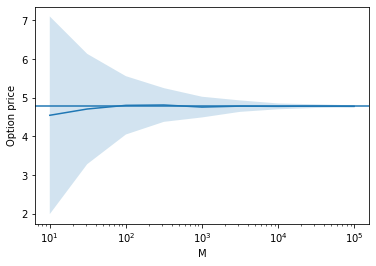

In [13]:
# Convergence study

Ms = np.logspace(1, 5, 9, dtype=int)

n_instances = 100
mean_values, std_values = [], []
for M in Ms:

    manager = SimulationManager(MonteCarloStockManager, n_instances,  M=M)

    mean, std = manager.calc_attribute(lambda man: man.calc_option_price()[1], run=False)

    mean_values.append(mean)
    std_values.append(std)

mean_values = np.array(mean_values)
std_values = np.array(std_values)

binomial_tree_value = 4.779

print(f"STD at {Ms[4]} is {mean_values[4]}")
plt.plot(Ms, mean_values)
plt.fill_between(Ms, mean_values - std_values, mean_values + std_values, alpha=0.2)
plt.axhline(binomial_tree_value)

plt.xlabel("M")
plt.ylabel("Option price")
plt.xscale("log")
plt.show() 

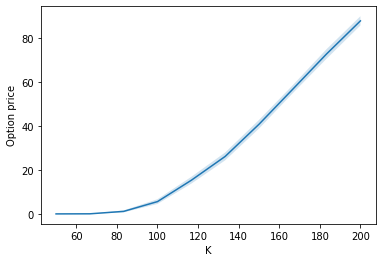

In [9]:
# Strike price study
M = 10**3
n_instances = 10
mean_values, std_values = [], []

Ks = np.linspace(50, 200, 10)

for K in Ks:

    manager = SimulationManager(MonteCarloStockManager, n_instances, M=M, K=K)

    mean, std = manager.calc_attribute(lambda man: man.calc_option_price()[1], run=False)

    mean_values.append(mean)
    std_values.append(std)

mean_values = np.array(mean_values)
std_values = np.array(std_values)

plt.plot(Ks, mean_values)
plt.fill_between(Ks, mean_values - std_values, mean_values + std_values, alpha=0.2)
plt.xlabel("K")
plt.ylabel("Option price")
plt.show() 

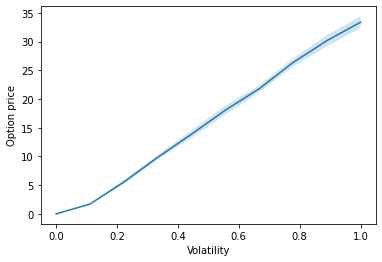

In [10]:
# Volatility price study
M = 10**3
n_instances = 10
mean_values, std_values = [], []

vols = np.linspace(0, 1, 10)

for vol in vols:

    manager = SimulationManager(MonteCarloStockManager, n_instances, M=M, vol=vol)

    mean, std = manager.calc_attribute(lambda man: man.calc_option_price()[1], run=False)

    mean_values.append(mean)
    std_values.append(std)

mean_values = np.array(mean_values)
std_values = np.array(std_values)

plt.plot(vols, mean_values)
plt.fill_between(vols, mean_values - std_values, mean_values + std_values, alpha=0.2)
plt.xlabel("Volatility")
plt.ylabel("Option price")
plt.show() 

## Part 2

In [22]:
# Fixed vs different seed

M=10**3
n_instances = 10

manager = SimulationManager(MonteCarloStockManager, n_instances, M=M)
diff_seed_mean, diff_seed_std = manager.calc_attribute(lambda man: man.calc_hedge_parameter(0.01, fixed_seed=False)[0], run=False)
fixed_seed_mean, fixed_seed_std = manager.calc_attribute(lambda man: man.calc_hedge_parameter(0.01, fixed_seed=True)[0], run=False)

print(f"Different seed delta: {diff_seed_mean} +- {diff_seed_std}")
print(f"Fixed seed delta: {fixed_seed_mean} +- {fixed_seed_std}")


Different seed delta: 9.212210728798478 +- 42.48317320055167
Fixed seed delta: -0.3289170068234082 +- 0.010643531469021906


In [ ]:
# TODO

## Part 3